In [1]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\shukl\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
df=pd.read_csv('all extracted pdf.csv')

In [3]:
df

,Manifesto
0,The Perspective\r The 15th State Assembly Ele...
1,MANIFESTO OF THE CONGRESS PARTY UTTAR PRADESH...
2,TAMILNADU GENERAL ASSEMBLY ELECTION - 2016 ...
3,An Appeal Inspired by the rich legacy and trad...
4,Haryana Pradesh Congress CommitteeLegislative ...
5,Namma Karnatakakke Namma Vachana A strong reso...
6,KARNATAKA MANIFESTO PROGRESS WITH CONGRESS Con...
7,Janata Dal Secular Election Party Manifesto My...
8,Janata Dal Secular Karnataka state manifesto A...
9,ASSEMBLY ELECTION KERALA LDF MANIFESTO We shou...


In [4]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [5]:






df['Manifesto'] = df['Manifesto'].apply(clean_text)




In [6]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df['Manifesto']=df['Manifesto'].apply(remove_stopwords)

In [7]:
import en_core_web_md
nlp = en_core_web_md.load()

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
        output = []
        for sent in texts:
                doc = nlp(sent) 
                output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
        return output

In [21]:
text_list=df['Manifesto'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[3])

manifesto congress party uttar pradesh vidhan sabha elections contents time change time uttar pradesh yaya dhikaar ikaas complete failure government congress congress partys commitments people uttar pradesh corruption free good governance order corruption free good governance justice panchayats gram sabhas empowering people education health employment food security women scheduled castes scheduled tribes backward classes elderly widows disabled minorities youth social justice social harmony productive economy efficient infrastructure power roads infrastructure agriculture industry urban rural development environment water trade commerce issues smaller states special cell implementation manifesto time change time uttar pradesh nyaya adhikaar vikaas people uttar pradesh deserve state live wholesome lives peace prosperity harmony security people uttar pradesh deserve opportunity grow economically socially make aspirations reality people uttar pradesh deserve promise protection violence cr

C:\Users\shukl\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['appeal', 'rich', 'legacy', 'tradition', 'people', 'bengal', 'blessing', 'good', 'mamatimanush', 'government', 'journey', '20th', 'despotic', 'reign', 'regime', 'people', 'government', 'people', 'support', 'dedication', 'hard', 'work', 'successful', 'endeavour', 'bengali', 'year', 'advanced', 'greeting', 'good', 'auspicious', 'occasion', 'today', 'fourandahalf', 'year', 'general', 'election', 'great', 'pride', 'short', 'period', 'government', 'able', 'promise', 'much', 'term', 'growth', 'development', 'bengal', 'height', 'short', 'span', 'bengal', 'people', 'social', 'economic', 'cultural', 'welfare', 'overall', 'stability', 'hallowed', 'principle', 'democracy', 'outright', 'slander', 'noncooperation', 'partisan', 'union', 'government', 'natural', 'economic', 'crisis', 'hurdle', 'today', 'bengal', 'lost', 'glory', 'today', 'example', 'development', 'harmony', 'possible', 'good', 'wish', 'good', 'faith', 'people', 'enriched', 'trust', 'mother', 'brother', 'sister', 'government', 'great

In [9]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [10]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=20, random_state=100,
                chunksize=10, passes=50,iterations=100)

In [11]:
lda_model.print_topics()


[(0,
  '0.088*"karnataka" + 0.024*"educaon" + 0.014*"progress" + 0.014*"achievement" + 0.013*"naonal" + 0.012*"cizen" + 0.011*"iniave" + 0.010*"irrigaon" + 0.010*"seng" + 0.010*"technology"'),
 (1,
  '0.000*"luxury" + 0.000*"malavalli" + 0.000*"lighting" + 0.000*"liter" + 0.000*"lokaukta" + 0.000*"lottery" + 0.000*"lowcost" + 0.000*"levy" + 0.000*"manjra" + 0.000*"married"'),
 (2,
  '0.000*"luxury" + 0.000*"malavalli" + 0.000*"lighting" + 0.000*"liter" + 0.000*"lokaukta" + 0.000*"lottery" + 0.000*"lowcost" + 0.000*"levy" + 0.000*"manjra" + 0.000*"married"'),
 (3,
  '0.025*"state" + 0.015*"government" + 0.010*"development" + 0.008*"policy" + 0.007*"scheme" + 0.007*"centre" + 0.006*"city" + 0.006*"industry" + 0.006*"district" + 0.006*"service"'),
 (4,
  '0.000*"luxury" + 0.000*"malavalli" + 0.000*"lighting" + 0.000*"liter" + 0.000*"lokaukta" + 0.000*"lottery" + 0.000*"lowcost" + 0.000*"levy" + 0.000*"manjra" + 0.000*"married"'),
 (5,
  '0.017*"government" + 0.012*"year" + 0.011*"developm

In [12]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary,mds='mmds')
vis

C:\Users\shukl\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
C:\Users\shukl\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:58: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shukl\anaconda3\lib\site-packages\sklearn

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.376550 -0.147047       1        1  43.657148
5     -0.390359  0.047517       2        1  35.141941
7     -0.229838 -0.321751       3        1  16.171850
11     0.161944 -0.298936       4        1   3.500146
0      0.068707  0.240236       5        1   1.130286
12     0.023885  0.079691       6        1   0.224930
17     0.016982  0.031050       7        1   0.152385
18     0.055787  0.028403       8        1   0.001640
16     0.055787  0.028403       9        1   0.001640
15     0.055787  0.028403      10        1   0.001640
14     0.055787  0.028403      11        1   0.001640
13     0.055787  0.028403      12        1   0.001640
10     0.055787  0.028403      13        1   0.001640
1      0.055787  0.028403      14        1   0.001640
9      0.055787  0.028403      15        1   0.001640
8      0.055787  0.028403      16        1   0.001640
6      0.055787  0.028403      17        1   0.001640
4      0.055787  0.028403      18        1   0.001640
2      0.055787  0.028403      19        1   0.001640
19     0.055787  0.028403      20        1   0.001640, topic_info=            Term        Freq       Total Category  logprob  loglift
4075   karnataka  251.000000  251.000000  Default  30.0000  30.0000
441         lakh  250.000000  250.000000  Default  29.0000  29.0000
173     congress  246.000000  246.000000  Default  28.0000  28.0000
84        bengal  116.000000  116.000000  Default  27.0000  27.0000
765       sector  322.000000  322.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
25           aid    0.000148    2.603789  Topic20  -9.0513   1.2439
26       airport    0.000148   41.974959  Topic20  -9.0513  -1.5362
27     alimuddin    0.000148    1.178930  Topic20  -9.0513   2.0363
28      alliance    0.000148   17.122403  Topic20  -9.0513  -0.6395
29    allianceii    0.000148    0.322442  Topic20  -9.0513   3.3327

[1179 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2         1  0.923164        academy
2         2  0.083924        academy
3         1  0.802523         access
3         3  0.209354         access
4         1  0.588828  accommodation
...     ...       ...            ...
957       3  0.169135           year
958       1  0.994969         yojana
960       1  0.763096          youth
960       3  0.238832          youth
5503      5  0.972763       ﬁnancial

[536 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 8, 12, 1, 13, 18, 19, 17, 16, 15, 14, 11, 2, 10, 9, 7, 5, 3, 20])

In [13]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=23))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\shukl\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -9.269818197862282

Coherence Score:  0.5558205499761574


In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=100,
                chunksize=10, passes=50,iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

C:\Users\shukl\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

C:\Users\shukl\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\shukl\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


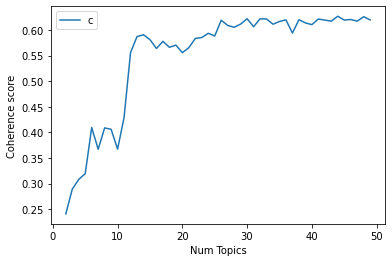

In [25]:
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [26]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2409
Num Topics = 3  has Coherence Value of 0.2893
Num Topics = 4  has Coherence Value of 0.3083
Num Topics = 5  has Coherence Value of 0.3195
Num Topics = 6  has Coherence Value of 0.4096
Num Topics = 7  has Coherence Value of 0.3672
Num Topics = 8  has Coherence Value of 0.4089
Num Topics = 9  has Coherence Value of 0.4062
Num Topics = 10  has Coherence Value of 0.3673
Num Topics = 11  has Coherence Value of 0.4294
Num Topics = 12  has Coherence Value of 0.556
Num Topics = 13  has Coherence Value of 0.5872
Num Topics = 14  has Coherence Value of 0.5908
Num Topics = 15  has Coherence Value of 0.5812
Num Topics = 16  has Coherence Value of 0.5639
Num Topics = 17  has Coherence Value of 0.5779
Num Topics = 18  has Coherence Value of 0.5663
Num Topics = 19  has Coherence Value of 0.5706
Num Topics = 20  has Coherence Value of 0.5558
Num Topics = 21  has Coherence Value of 0.5655
Num Topics = 22  has Coherence Value of 0.5836
Num Topics = 23  has C

C:\Users\shukl\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

C:\Users\shukl\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.016*"state" + 0.016*"congress" + 0.013*"government" + 0.012*"nagaland" + 0.011*"karnataka" + 0.008*"development" + 0.007*"people" + 0.007*"pradesh" + 0.006*"election" + 0.005*"fund"'),
 (1,
  '0.004*"stateø" + 0.003*"rainbow" + 0.003*"shivsena" + 0.003*"youngster" + 0.002*"draught" + 0.002*"complicated" + 0.001*"etcø" + 0.001*"departmentø" + 0.001*"policeman" + 0.001*"capable"'),
 (2,
  '0.014*"haryana" + 0.008*"month" + 0.002*"mayor" + 0.002*"canal" + 0.002*"former" + 0.002*"honorarium" + 0.002*"mewat" + 0.002*"deputy" + 0.002*"rail" + 0.001*"upliftment"'),
 (3,
  '0.016*"state" + 0.014*"assam" + 0.013*"government" + 0.008*"development" + 0.006*"city" + 0.006*"scheme" + 0.006*"delhi" + 0.006*"policy" + 0.005*"water" + 0.005*"citizen"'),
 (4,
  '0.016*"government" + 0.010*"state" + 0.009*"development" + 0.008*"year" + 0.007*"project" + 0.006*"sector" + 0.006*"education" + 0.006*"scheme" + 0.006*"people" + 0.005*"water"')]

In [28]:
print('\nPerplexity: ', optimal_model.log_perplexity(doc_term_matrix,total_docs=23))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=optimal_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\shukl\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -12.364797169485385

Coherence Score:  0.6269162445330716


In [32]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary,mds='mmds')
vis

C:\Users\shukl\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\shukl\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:58: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\shukl\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:58: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warni

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.151846 -0.065438       1        1  48.311139
3      0.082604 -0.174752       2        1  36.569221
0     -0.142020 -0.107181       3        1  14.257937
2     -0.064878  0.165990       4        1   0.464372
1     -0.027553  0.181381       5        1   0.397331, topic_info=           Term        Freq       Total Category  logprob  loglift
522       month  133.000000  133.000000  Default  30.0000  30.0000
8071      assam  388.000000  388.000000  Default  29.0000  29.0000
173    congress  231.000000  231.000000  Default  28.0000  28.0000
4075  karnataka  197.000000  197.000000  Default  27.0000  27.0000
8441   nagaland  127.000000  127.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
7613   actionsø    0.151321    0.803321   Topic5  -7.6124   3.8588
7615       aero    0.151321    0.803321   Topic5  -7.6124   3.8588
4906   godavari    0.267997    1.445549   Topic5  -7.0408   3.8429
7584  youngster    0.794266    4.509016   Topic5  -5.9544   3.7917
120     capable    0.352353    3.208197   Topic5  -6.7672   3.3193

[335 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
7869      2  0.999225      aadmi
4543      3  0.698891   accurate
969       1  0.805532     action
969       2  0.175921     action
969       3  0.027777     action
...     ...       ...        ...
7584      2  0.665334  youngster
7584      5  0.221778  youngster
960       1  0.280224      youth
960       2  0.573793      youth
960       3  0.146784      youth

[429 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 1, 3, 2])